In [1]:

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Rectangle, Arc

#the following code is from Savvas Tjortjoglou , it is used to draw the court to make the shot chart more readable
#http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

The API interface may have changed refer to https://github.com/swar/nba_api/tree/master/docs/nba_api for the latest documentation. The following code is based on the documentation as of 2023.

In [2]:
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

# murray_id = players.find_players_by_full_name("Jamal Murray")[0]['id']
# pope_id = players.find_players_by_full_name("Kentavious Caldwell-Pope")[0]['id']    
# gordon_id = players.find_players_by_full_name("Aaron Gordon")[0]['id']
# jokic_id = players.find_players_by_full_name("Nikola Jokic")[0]['id']
# porter_id = players.find_players_by_full_name("Michael Porter Jr.")[0]['id']
# denver_id = teams.find_teams_by_full_name("Denver Nuggets")[0]['id']

# print(murray_id)
# print(pope_id)
# print(porter_id)
# print(jokic_id)
# print(gordon_id)

# jokic_shots_playoffs=shotchartdetail.ShotChartDetail(team_id=denver_id,player_id=jokic_id,season_nullable='2022-23',context_measure_simple='FG',season_type_all_star='Playoffs')
# pope_shots_playoffs=shotchartdetail.ShotChartDetail(team_id=denver_id,player_id=pope_id,season_nullable='2022-23',context_measure_simple='FG',season_type_all_star='Playoffs')
# murray_shots_playoffs=shotchartdetail.ShotChartDetail(team_id=denver_id,player_id=murray_id,season_nullable='2022-23',context_measure_simple='FG',season_type_all_star='Playoffs')
# gordon_shots_playoffs=shotchartdetail.ShotChartDetail(team_id=denver_id,player_id=gordon_id,season_nullable='2022-23',context_measure_simple='FG',season_type_all_star='Playoffs')
# porter_shots_playoffs=shotchartdetail.ShotChartDetail(team_id=denver_id,player_id=porter_id,season_nullable='2022-23',context_measure_simple='FG',season_type_all_star='Playoffs')

# print(murray_shots_playoffs.get_request_url())
# print(murray_shots_playoffs.get_data_frames()[0])

# df_murray=murray_shots_playoffs.get_data_frames()[0]
# df_jokic=jokic_shots_playoffs.get_data_frames()[0]
# df_pope=pope_shots_playoffs.get_data_frames()[0]
# df_gordon=gordon_shots_playoffs.get_data_frames()[0]
# df_porter=porter_shots_playoffs.get_data_frames()[0]


# #write data to csv
# df_murray.to_csv('shot_location_data/murray_shots_playoffs.csv')
# df_jokic.to_csv('shot_location_data/jokic_shots_playoffs.csv')
# df_pope.to_csv('shot_location_data/pope_shots_playoffs.csv')
# df_gordon.to_csv('shot_location_data/gordon_shots_playoffs.csv')
# df_porter.to_csv('shot_location_data/porter_shots_playoffs.csv')


In [3]:


#read data from csv
df_murray=pd.read_csv('shot_location_data/murray_shots_playoffs.csv')
df_jokic=pd.read_csv('shot_location_data/jokic_shots_playoffs.csv')
df_pope=pd.read_csv('shot_location_data/pope_shots_playoffs.csv')
df_gordon=pd.read_csv('shot_location_data/gordon_shots_playoffs.csv')
df_porter=pd.read_csv('shot_location_data/porter_shots_playoffs.csv')


#filter out missed shots
df_murray=df_murray[df_murray['SHOT_MADE_FLAG']==1]
df_jokic=df_jokic[df_jokic['SHOT_MADE_FLAG']==1]
df_pope=df_pope[df_pope['SHOT_MADE_FLAG']==1]
df_gordon=df_gordon[df_gordon['SHOT_MADE_FLAG']==1]
df_porter=df_porter[df_porter['SHOT_MADE_FLAG']==1]


#df_murray.head()
#can do further processing to elminate missed shots

#df.to_csv('murray_shots_playoffs.csv')


0.5545454545454546
0.4


Text(0.5, 1.0, 'Denver nuggets starter shot chart Playoffs 2022-23')

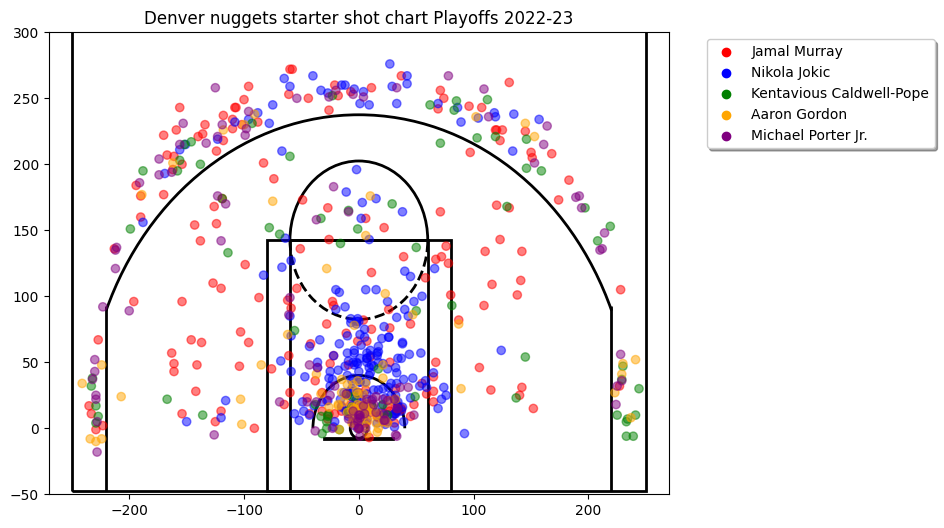

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model=KNeighborsClassifier(n_neighbors=5)

trim_murray=df_murray[['LOC_X','LOC_Y','PLAYER_NAME']]
trim_jokic=df_jokic[['LOC_X','LOC_Y','PLAYER_NAME']]
trim_pope=df_pope[['LOC_X','LOC_Y','PLAYER_NAME']]
trim_gordon=df_gordon[['LOC_X','LOC_Y','PLAYER_NAME']]
trim_porter=df_porter[['LOC_X','LOC_Y','PLAYER_NAME']]

#join the two dataframes
trim_df=pd.concat([trim_murray,trim_jokic,trim_pope,trim_gordon,trim_porter])



#split the data into training and testing
X_train, X_valid, y_train, y_valid = train_test_split(trim_df[['LOC_X','LOC_Y']], trim_df['PLAYER_NAME'], test_size=0.05, random_state=0)

#fit the model
model.fit(X_train,y_train)


print(model.score(X_train,y_train))
print(model.score(X_valid,y_valid))



colors = {'Jamal Murray':'red', 'Nikola Jokic':'blue', 'Kentavious Caldwell-Pope':'green', 'Aaron Gordon':'orange', 'Michael Porter Jr.':'purple'}
plt.figure(figsize=(8,6))
draw_court(outer_lines=True)
plt.xlim(-270,270)
plt.ylim(-50,300)
plt.scatter(trim_df.LOC_X, trim_df.LOC_Y, c=trim_df['PLAYER_NAME'].apply(lambda x: colors[x]),alpha=0.5)
#legend showing the color to player mapping
for player in colors:
    plt.scatter([], [], c=colors[player], label=player)
plt.legend(loc='best',bbox_to_anchor=(1.05,1), shadow=True, scatterpoints=1)
plt.title('Denver nuggets starter shot chart Playoffs 2022-23')

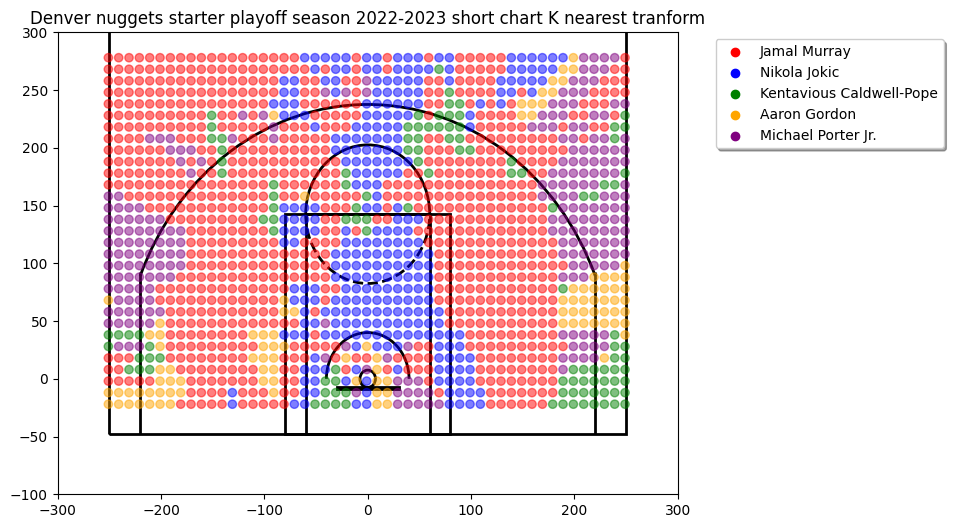

In [5]:
import numpy as np  
min_y=trim_df['LOC_Y'].min()
max_y=trim_df['LOC_Y'].max()
min_x=trim_df['LOC_X'].min()
max_x=trim_df['LOC_X'].max()

#genereate a grid of points to predict
xx, yy = np.meshgrid(np.arange(min_x-10, max_x+10, 10),
                     np.arange(min_y-4, max_y+10, 10))

grid_frame=pd.DataFrame({'LOC_X':xx.ravel(),'LOC_Y':yy.ravel()})

grid_frame['PLAYER_NAME']=model.predict(grid_frame[['LOC_X','LOC_Y']])

plt.figure(figsize=(8,6))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,300)
plt.scatter(grid_frame.LOC_X, grid_frame.LOC_Y, c=grid_frame['PLAYER_NAME'].apply(lambda x: colors[x]),alpha=0.5)
#legend showing the color to player mapping
for player in colors:
    plt.scatter([], [], c=colors[player], label=player)
plt.legend(loc='best',bbox_to_anchor=(1.05,1), shadow=True, scatterpoints=1)
plt.title('Denver nuggets starter playoff season 2022-2023 short chart K nearest tranform')
plt.show()
